### Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()
import warnings
warnings.simplefilter("ignore")

In [2]:
PATH_TO_WAR_AND_PEACE = '../data/war_and_peace/' 
text = ''
for file in os.listdir(PATH_TO_WAR_AND_PEACE):
    print(PATH_TO_WAR_AND_PEACE + file)
    with open(PATH_TO_WAR_AND_PEACE + file, 'r', encoding='utf-8') as f:
        text += f.read().lower()
text = re.sub('[^а-я ]','', text)
print(f'Total len :{len(text)}, {text[:100]}')

../data/war_and_peace/tom_1.txt
../data/war_and_peace/tom_2.txt
../data/war_and_peace/tom_3.txt
../data/war_and_peace/tom_4.txt
Total len :2763426, лев толстойвойна и миртом   том часть перваячасть ораячасть третья  том лев николаевич толстойвойна 


In [3]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщьыъэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

### Постройте матрицу переходных вероятностей. 

In [4]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [5]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [6]:
df = pd.DataFrame(probabilities, index=[i for i in RUSSIAN[:-1]] + ['Пробел'], columns=[i for i in RUSSIAN[:-1]] + ['Пробел'])

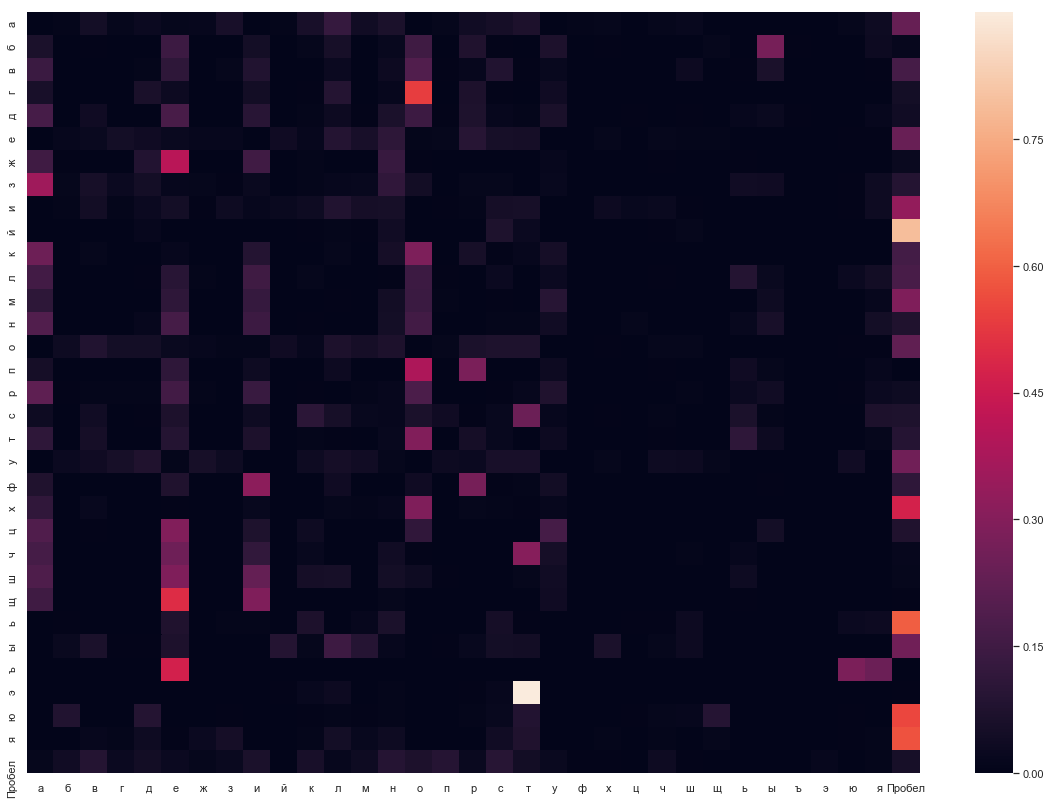

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,14))
sns.heatmap(df)
plt.show()

### Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [8]:
RUSSIAN[:-1]

'абвгдежзийклмнопрстуфхцчшщьыъэюя'

In [9]:
start = POS['п']
end = POS['р']
total_proba = 0
prior = 1. / len(RUSSIAN[:-1])
for char_1 in RUSSIAN[:-1]:
    for char_2 in RUSSIAN[:-1]:
        proba = prior * probabilities[start, POS[char_1]] * probabilities[POS[char_1], POS[char_2]] * probabilities[POS[char_2], end]
        total_proba += proba
            
print(f'Вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р : {total_proba}')

Вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р : 0.000861956953555952


### Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [10]:
s = []
start = np.random.choice(list(RUSSIAN[:-1]))
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

ло ныво ш


### Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [11]:
import numpy as np
from hmmlearn import hmm

In [12]:
data = pd.read_csv('../data/graph.txt', delimiter='     ').iloc[:, :2]
data.columns = ['Year', 'Temperature']
data = data.set_index(data.Year).drop(['Year'], axis=1)
data.head()

,Temperature
Year,
1881,-0.08
1882,-0.10
1883,-0.17
1884,-0.28
1885,-0.32


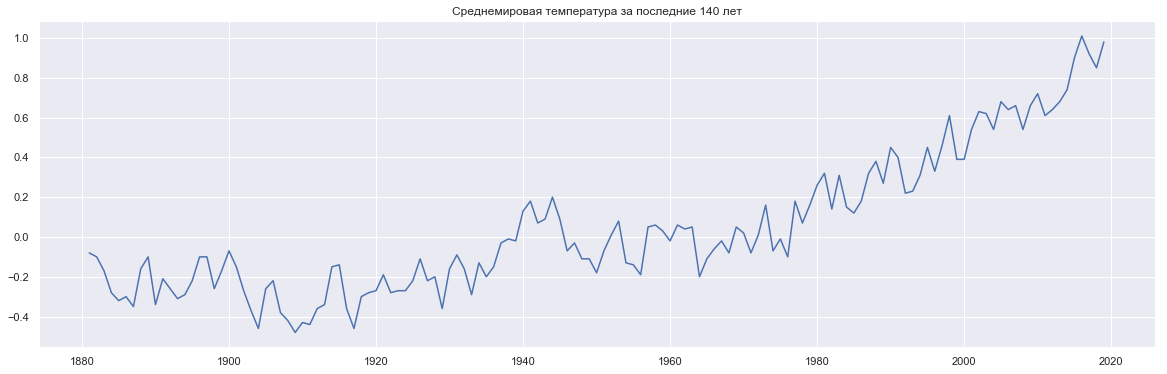

In [13]:
plt.figure(figsize=(20,6))
plt.plot(data.Temperature)
plt.title('Среднемировая температура за последние 140 лет')
plt.show()

In [14]:
values = data.values.reshape(-1,1)

Fitting a model with 142 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 167 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 287 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 322 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 359 free scalar parameters with only 139 data points will result in a degenerate solution.
Fitting a model with 398 free scalar parameters with only 139 data points will result in a degenerate so

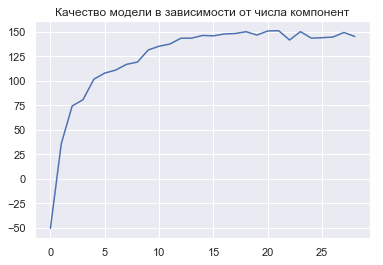

In [15]:
scores = []
for n in range(1,30):
    model = hmm.GaussianHMM(n_components=n,
                            covariance_type="diag",
                            n_iter=100)
    model.fit(values)
    scores.append(model.score(values))

plt.title('Качество модели в зависимости от числа компонент')
plt.plot(scores)
plt.show()

In [16]:
optimal_components = np.argmax(scores)
print(f'Оптимальное количество компонент с точки зрения качества : {optimal_components}')

Оптимальное количество компонент с точки зрения качества : 21


Fitting a model with 482 free scalar parameters with only 139 data points will result in a degenerate solution.


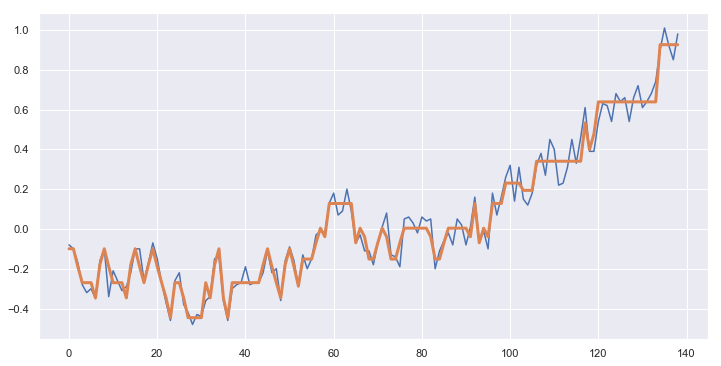

In [17]:
model = hmm.GaussianHMM(n_components=optimal_components,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.show()

В данном случае ряд имеет тренд, так что скрытая марковская модель может быть не лучшим вариантом использования